<a href="https://colab.research.google.com/github/burrittresearch/house-price-regression-in-python/blob/main/house-price-regression-in-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Regression in Python
Predict California house prices using multiple and polynomial regression in python.

Data Source: [Scikit-learn Housing Dataset]('https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html')


# Project Workflow
* Define the Problem
* Process Data
* Model Predictions: Multiple Linear Regression
  - Evalute the Results
  - Plot the Results
* Model Predictions: Polynomial Regression
  - Evalute the Results
  - Plot the Results
* Deploy the Model Using Polynomial Regression

# Define the Problem
Predict California house prices accurately using house features.

# Process Data

In [ ]:
# Import libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# Import data
from sklearn.datasets import fetch_california_housing

In [ ]:
# Set display options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.precision', 3)

# Set plot options
plt.style.use('fivethirtyeight')

# Line break utility
str_lb = '\n \n'

In [ ]:
# Load data
cali_housing_data = fetch_california_housing(as_frame=True)

# Explore data
print(f'cali_housing_data.DESCR: {str_lb}{cali_housing_data.DESCR}{str_lb}',
  f'cali_housing_data.data: {str_lb}{cali_housing_data.data}{str_lb}',
  f'cali_housing_data.feature_names: {str_lb}{cali_housing_data.feature_names}{str_lb}',
  f'cali_housing_data.target: {str_lb}{cali_housing_data.target}{str_lb}',
  f'cali_housing_data.target_names: {str_lb}{cali_housing_data.target_names}{str_lb}'
)

cali_housing_data.DESCR: 
 
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000

In [ ]:
# Create dataframe for feature and target data
df_cali_housing = cali_housing_data.data
df_cali_housing['target_house_val'] = cali_housing_data.target
print(f'df_cali_housing: {str_lb}{df_cali_housing}{str_lb}')

df_cali_housing: 
 
       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  target_house_val
0      8.325   41.0      6.984     1.024       322.0      2.556     37.88    -122.23     4.526           
1      8.301   21.0      6.238     0.972      2401.0      2.110     37.86    -122.22     3.585           
2      7.257   52.0      8.288     1.073       496.0      2.802     37.85    -122.24     3.521           
3      5.643   52.0      5.817     1.073       558.0      2.548     37.85    -122.25     3.413           
4      3.846   52.0      6.282     1.081       565.0      2.181     37.85    -122.25     3.422           
...       ...       ...       ...        ...         ...       ...       ...        ...               ...
20635  1.560   25.0      5.045     1.133       845.0      2.561     39.48    -121.09     0.781           
20636  2.557   18.0      6.114     1.316       356.0      3.123     39.49    -121.21     0.771           
20637  1.700   17.0      5

In [ ]:
# Rename columns
dict_rename = {'MedInc': 'med_inc',
  'HouseAge': 'house_age',
  'AveRooms': 'ave_rooms',
  'AveBedrms' : 'ave_bedrms', 
  'Population': 'population', 
  'AveOccup': 'ave_occup', 
  'Latitude': 'latitude', 
  'Longitude': 'longitude',  
}
df_cali_housing.rename(columns=dict_rename, inplace=True)
print(f'df_cali_housing: {str_lb}{df_cali_housing}{str_lb}')

df_cali_housing: 
 
       med_inc  house_age  ave_rooms  ave_bedrms  population  ave_occup  latitude  longitude  target_house_val
0      8.325    41.0       6.984      1.024        322.0      2.556      37.88    -122.23     4.526           
1      8.301    21.0       6.238      0.972       2401.0      2.110      37.86    -122.22     3.585           
2      7.257    52.0       8.288      1.073        496.0      2.802      37.85    -122.24     3.521           
3      5.643    52.0       5.817      1.073        558.0      2.548      37.85    -122.25     3.413           
4      3.846    52.0       6.282      1.081        565.0      2.181      37.85    -122.25     3.422           
...        ...        ...        ...         ...         ...        ...       ...        ...               ...
20635  1.560    25.0       5.045      1.133        845.0      2.561      39.48    -121.09     0.781           
20636  2.557    18.0       6.114      1.316        356.0      3.123      39.49    -121.21   

In [ ]:
# Reindex columns
lst_reorder_col = ['target_house_val',
  'ave_bedrms',
  'ave_occup', 
  'ave_rooms',
  'house_age', 
  'latitude', 
  'longitude',
  'med_inc', 
  'population', 
]
df_cali_housing = df_cali_housing.reindex(columns=lst_reorder_col).copy()
print(f'df_cali_housing: {str_lb}{df_cali_housing}{str_lb}')

df_cali_housing: 
 
       target_house_val  ave_bedrms  ave_occup  ave_rooms  house_age  latitude  longitude  med_inc  population
0      4.526             1.024       2.556      6.984      41.0       37.88    -122.23     8.325     322.0    
1      3.585             0.972       2.110      6.238      21.0       37.86    -122.22     8.301    2401.0    
2      3.521             1.073       2.802      8.288      52.0       37.85    -122.24     7.257     496.0    
3      3.413             1.073       2.548      5.817      52.0       37.85    -122.25     5.643     558.0    
4      3.422             1.081       2.181      6.282      52.0       37.85    -122.25     3.846     565.0    
...                 ...         ...        ...        ...        ...       ...        ...      ...         ...
20635  0.781             1.133       2.561      5.045      25.0       39.48    -121.09     1.560     845.0    
20636  0.771             1.316       3.123      6.114      18.0       39.49    -121.21     2

In [ ]:
# Explore data
print(f'df_cali_housing.info(): {str_lb}{df_cali_housing.info()}{str_lb}',
  f'df_cali_housing.shape: {str_lb}{df_cali_housing.shape}{str_lb}',
  f'df_cali_housing.describe(): {str_lb}{df_cali_housing.describe()}{str_lb}',
  f'df_cali_housing.corr(method="pearson"): {str_lb}{df_cali_housing.corr(method="pearson")}{str_lb}'  
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   target_house_val  20640 non-null  float64
 1   ave_bedrms        20640 non-null  float64
 2   ave_occup         20640 non-null  float64
 3   ave_rooms         20640 non-null  float64
 4   house_age         20640 non-null  float64
 5   latitude          20640 non-null  float64
 6   longitude         20640 non-null  float64
 7   med_inc           20640 non-null  float64
 8   population        20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
df_cali_housing.info(): 
 
None
 
 df_cali_housing.shape: 
 
(20640, 9)
 
 df_cali_housing.describe(): 
 
       target_house_val  ave_bedrms  ave_occup  ave_rooms  house_age  latitude   longitude  med_inc    population
count  20640.000         20640.000   20640.000  20640.000  20640.000  20640.000  20640.000  20640.000  20640.000 
m

In [ ]:
# Explore correlation of features
df_cali_housing.corr(method='pearson')

,target_house_val,ave_bedrms,ave_occup,ave_rooms,house_age,latitude,longitude,med_inc,population
target_house_val,1.000,-0.047,-0.024,0.152,0.106,-0.144,-0.046,0.688,-0.025
ave_bedrms,-0.047,1.000,-0.006,0.848,-0.078,0.070,0.013,-0.062,-0.066
ave_occup,-0.024,-0.006,1.000,-0.005,0.013,0.002,0.002,0.019,0.070
ave_rooms,0.152,0.848,-0.005,1.000,-0.153,0.106,-0.028,0.327,-0.072
house_age,0.106,-0.078,0.013,-0.153,1.000,0.011,-0.108,-0.119,-0.296
latitude,-0.144,0.070,0.002,0.106,0.011,1.000,-0.925,-0.080,-0.109
longitude,-0.046,0.013,0.002,-0.028,-0.108,-0.925,1.000,-0.015,0.100
med_inc,0.688,-0.062,0.019,0.327,-0.119,-0.080,-0.015,1.000,0.005
population,-0.025,-0.066,0.070,-0.072,-0.296,-0.109,0.100,0.005,1.000


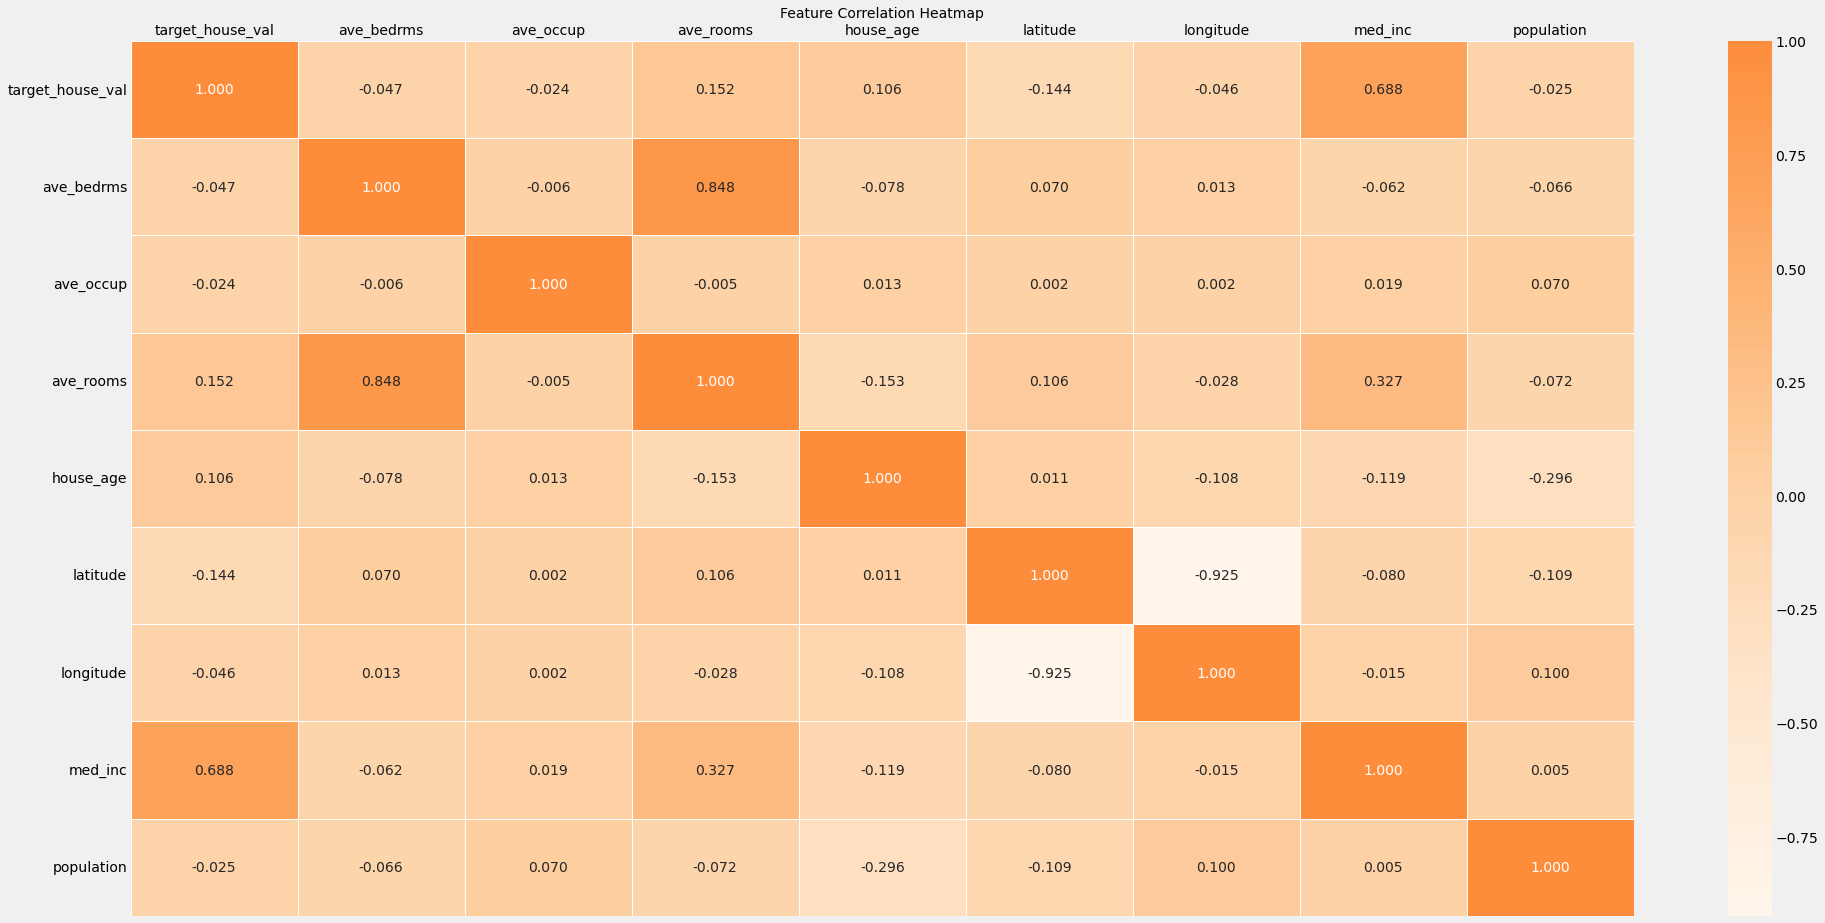

In [ ]:
# Correlation heatmap
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
ax = sns.heatmap(df_cali_housing.corr(method = 'pearson'), cmap='Oranges', center=1, annot=True, fmt='.3f', annot_kws={'size': 14}, linewidth=0.5)
ax.xaxis.tick_top()
ax.set_title('Feature Correlation Heatmap', fontsize=14)
plt.show()


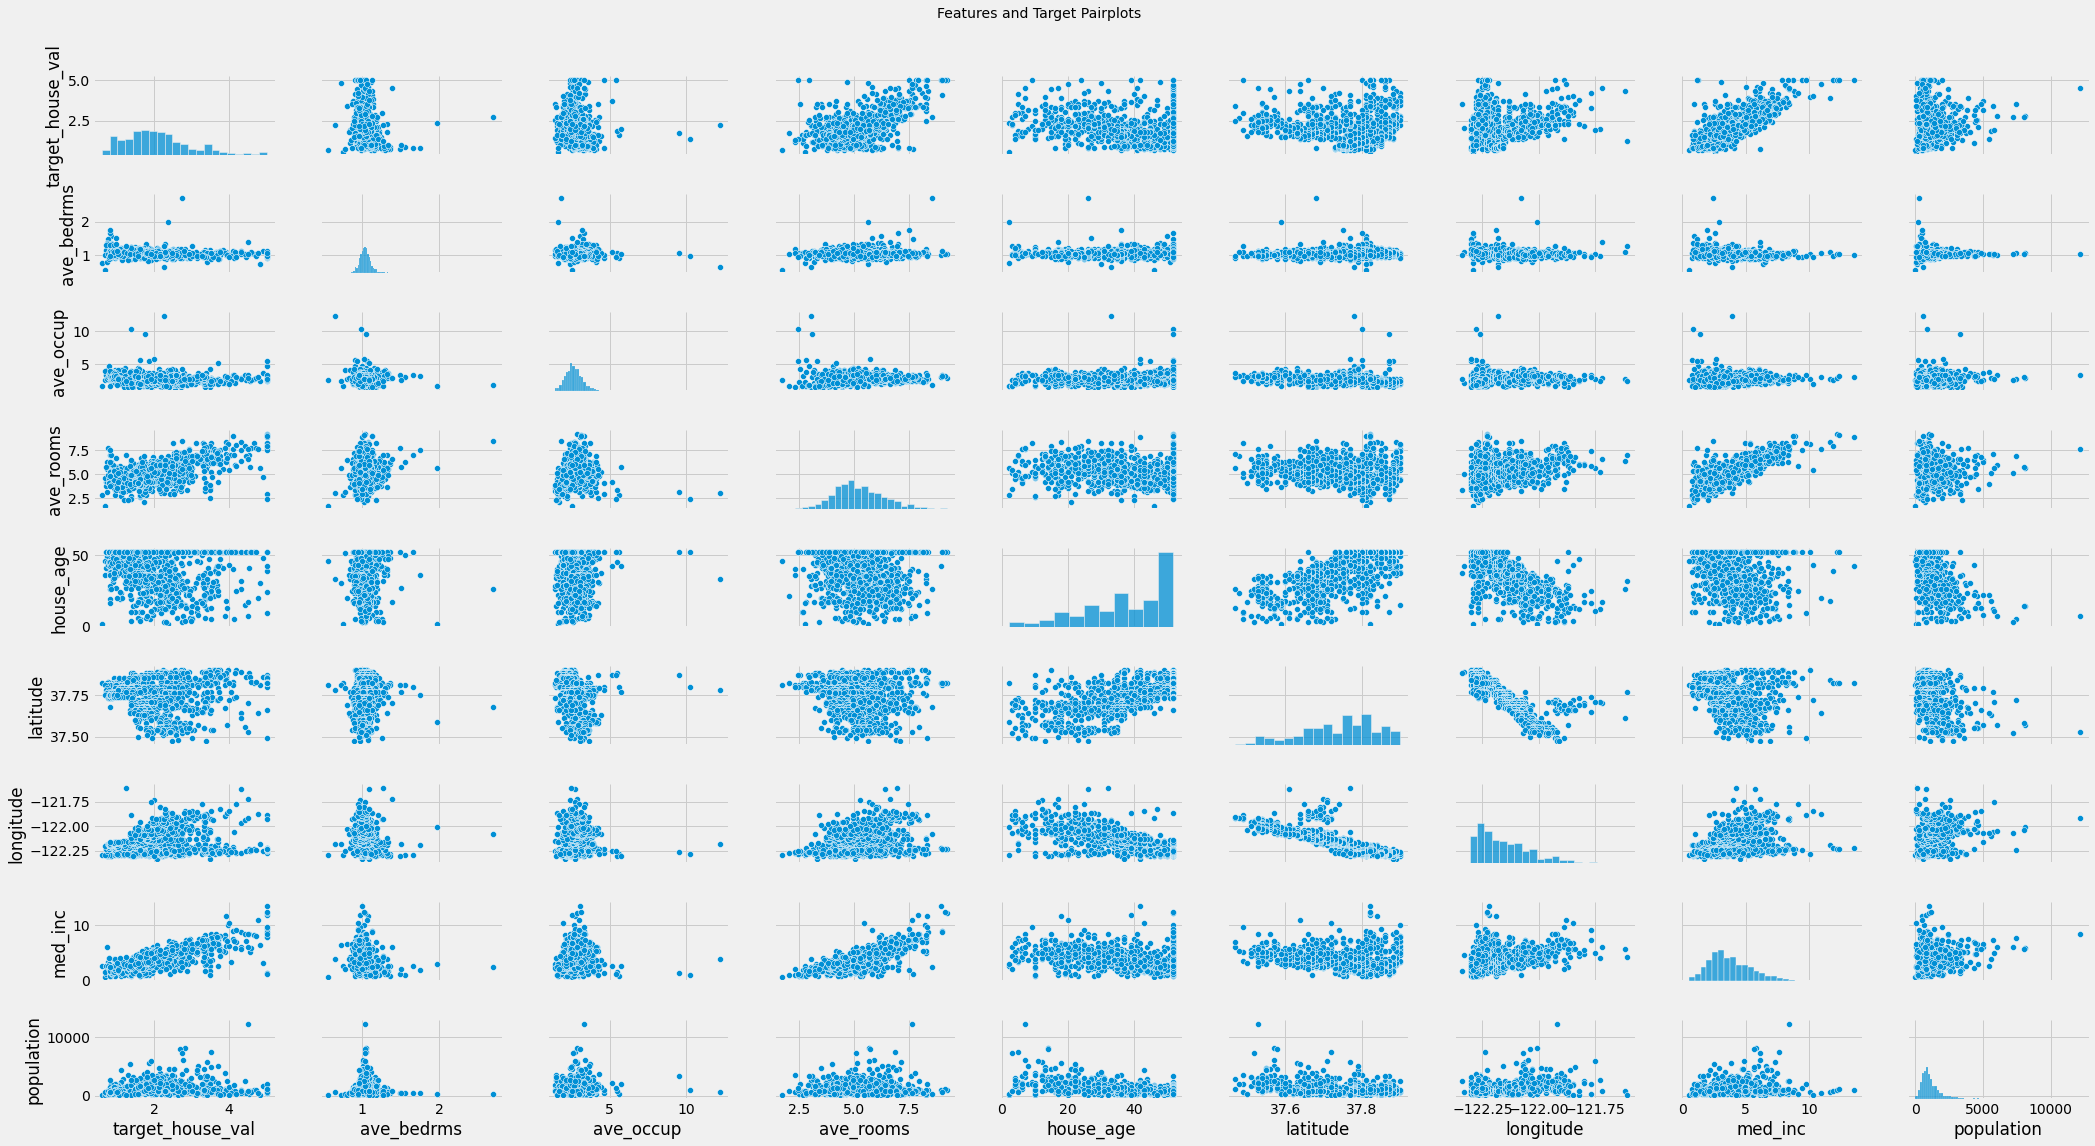

In [ ]:
# Visualize features and target using pairplots
lst_features = ['target_house_val',
  'ave_bedrms',
  'ave_occup', 
  'ave_rooms',
  'house_age', 
  'latitude', 
  'longitude',
  'med_inc', 
  'population', 
]
int_rows_to_use = 1000

grid_pair = sns.pairplot(df_cali_housing[:int_rows_to_use], vars=lst_features)
grid_pair.fig.set_size_inches(30, 15)
grid_pair.fig.suptitle('Features and Target Pairplots', y=1.05, fontsize=14)
grid_pair.fig.subplots_adjust(hspace=0.50, wspace=0.25)
plt.show()


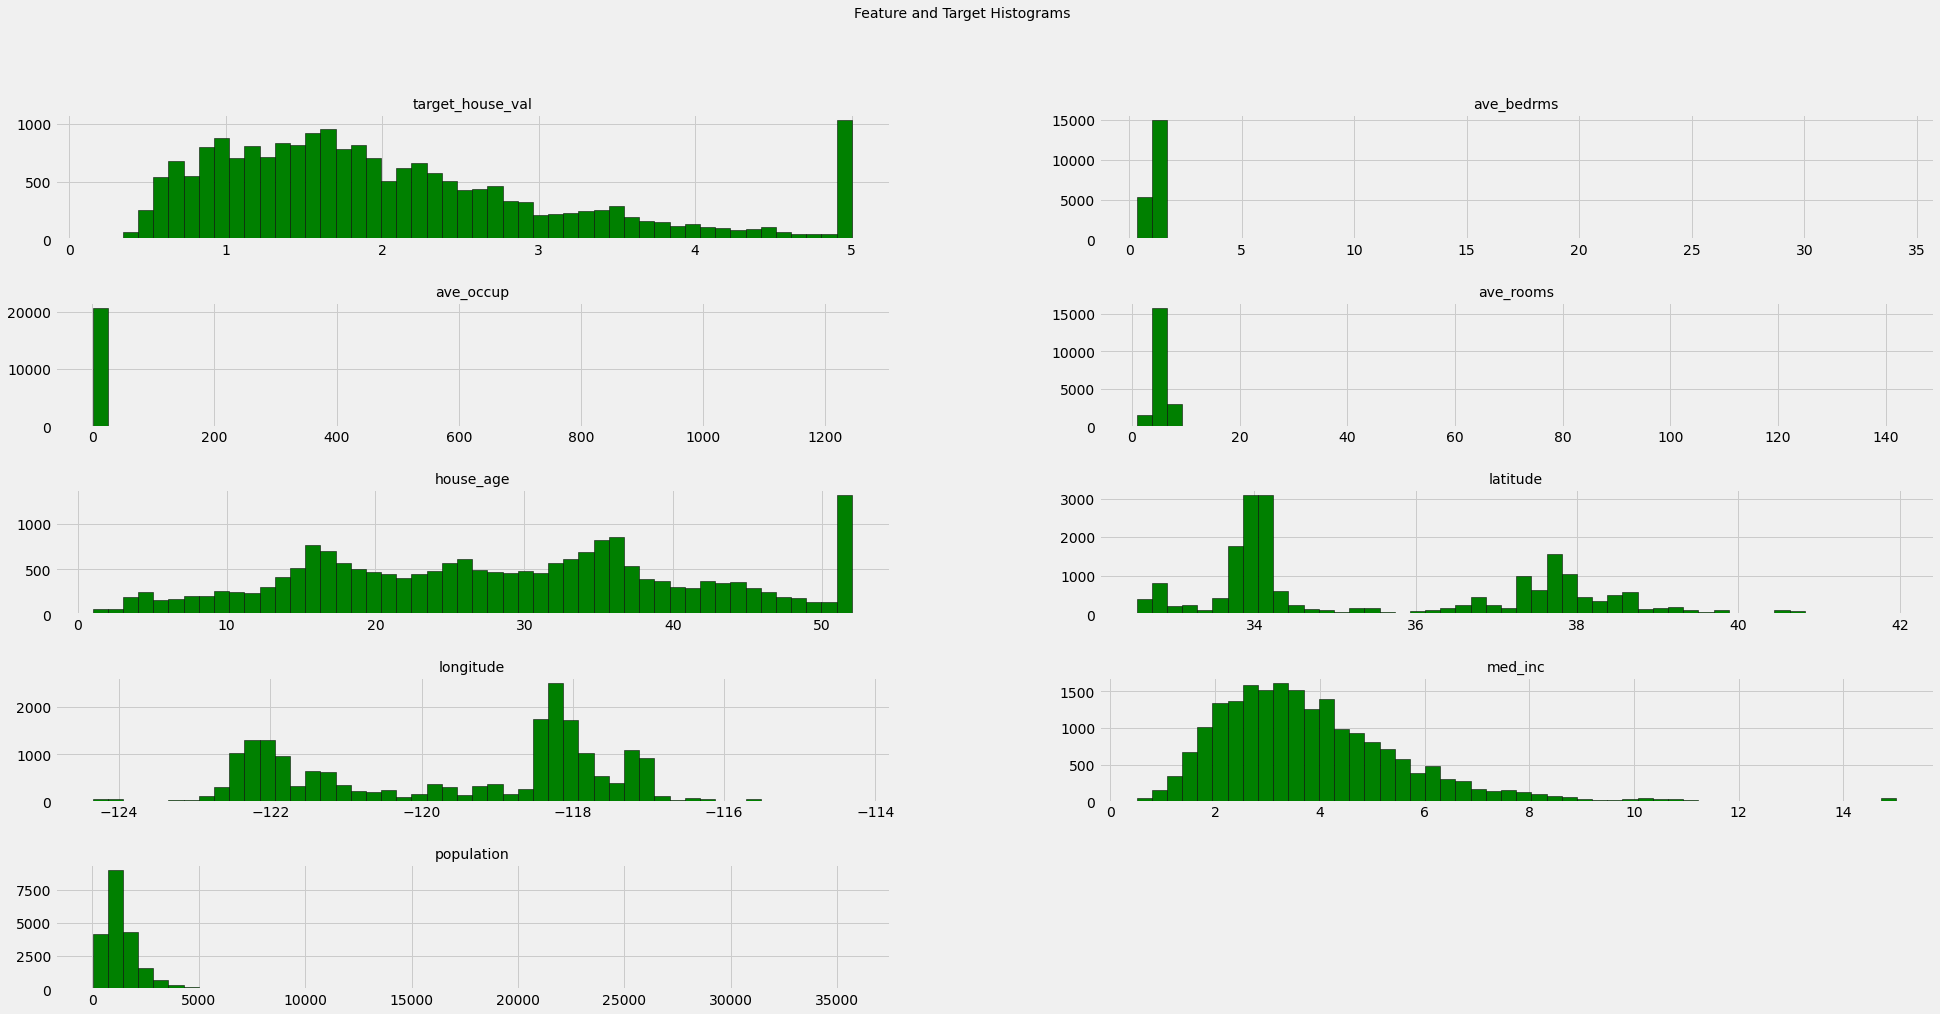

In [ ]:
# Function to visualize features and target histograms
lst_features = df_cali_housing.columns

def plot_hist(dataframe, features, int_cols):

  if int_cols >= 1:
    int_rows = math.ceil((len(features)/int_cols))
    fig = plt.figure(figsize=(30, 15))
  
    if type(int_cols) != int:
      int_cols = math.ceil(int_cols)
    for int_index, str_feature in enumerate(features):
      ax = fig.add_subplot(int_rows, int_cols, int_index + 1)
      ax.hist(dataframe[str_feature], bins=50, color='green', edgecolor='black')
      ax.set_title(str_feature, fontsize=14)
      plt.subplots_adjust(hspace=0.50, wspace=0.25)
    fig.suptitle('Feature and Target Histograms', fontsize=14)
    plt.show()
  else:
    print('You must enter a column number greater than 0!')
    exit()

plot_hist(df_cali_housing, lst_features, 2)


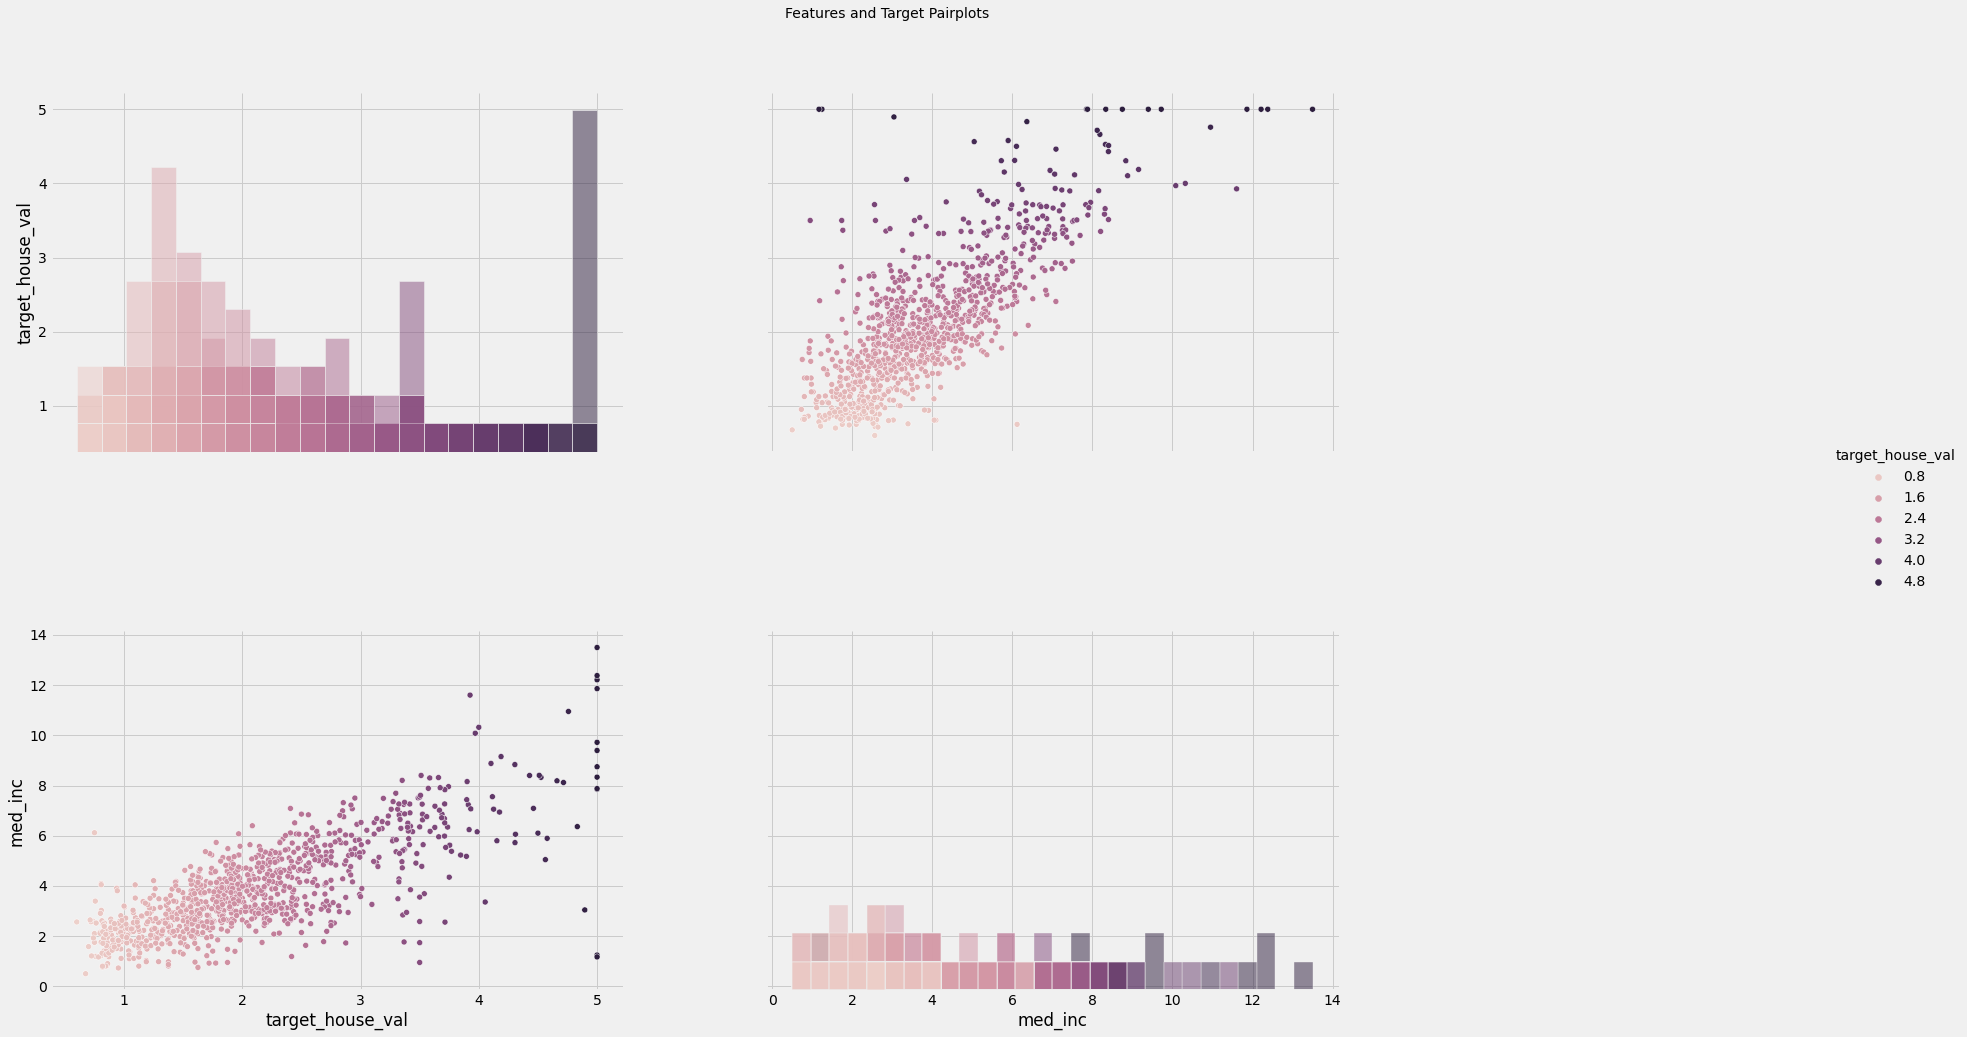

In [ ]:
# Refine features
lst_features = ['target_house_val',
  # 'ave_bedrms',
  # 'ave_occup', 
  # 'ave_rooms',
  # 'house_age', 
  # 'latitude', 
  # 'longitude',
  'med_inc', 
  # 'population', 
]
int_rows_to_use = 1000

grid_pair = sns.pairplot(df_cali_housing[:int_rows_to_use], hue='target_house_val', vars=lst_features, diag_kind='hist')
grid_pair.fig.set_size_inches(30, 15)
grid_pair.fig.suptitle('Features and Target Pairplots', y=1.05, fontsize=14)
grid_pair.fig.subplots_adjust(hspace=0.50, wspace=0.25)
plt.show()

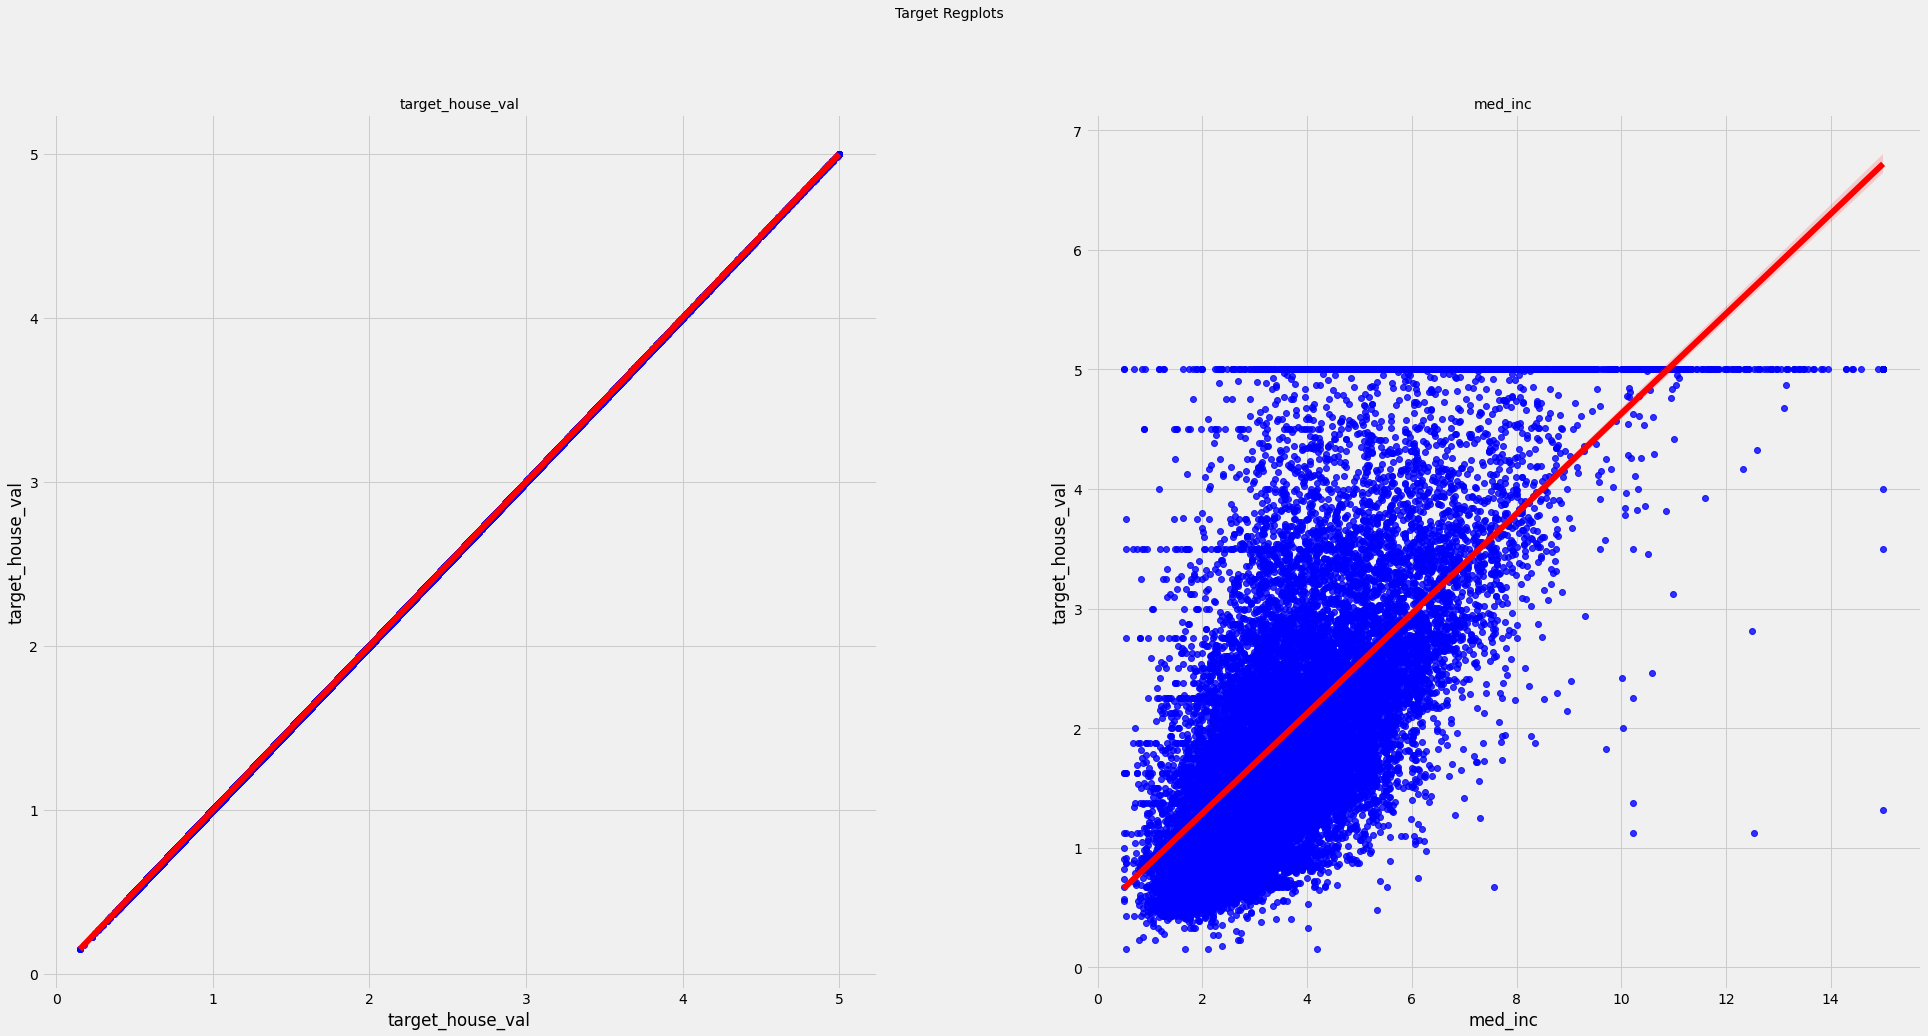

In [ ]:
# Function to visualize target regplots
lst_features = ['target_house_val',
  # 'ave_bedrms',
  # 'ave_occup', 
  # 'ave_rooms',
  # 'house_age', 
  # 'latitude', 
  # 'longitude',
  'med_inc', 
  # 'population', 
]

def plot_reg(dataframe, features, target, int_cols):

  if int_cols >= 1:
    int_rows = math.ceil((len(features)/int_cols))
    fig = plt.figure(figsize=(30, 15))

    if type(int_cols) != int:
      int_cols = math.ceil(int_cols)
    for int_index, str_feature in enumerate(features):
      ax = fig.add_subplot(int_rows, int_cols, int_index + 1)
      sns.regplot(x=dataframe[str_feature], y=dataframe[target], color='blue', line_kws={"color": "red"})
      ax.set_title(str_feature, fontsize=14)
      plt.subplots_adjust(hspace=0.50, wspace=0.25)
    fig.suptitle('Target Regplots', fontsize=14)
    plt.show()
  else:
    print('You must enter a column number greater than 0!')
    exit()

plot_reg(df_cali_housing, lst_features, ['target_house_val'], 2)

# Model Predictions: Multiple Linear Regression

In [ ]:
# Set feature list for all models
lst_features = [# 'target_house_val',
  'ave_bedrms',
  'ave_occup', 
  'ave_rooms',
  'house_age', 
  'latitude', 
  'longitude',
  'med_inc', 
  'population', 
]

In [ ]:
# Create the training and test sets
X = df_cali_housing[lst_features]
y = df_cali_housing.target_house_val
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Explore feature data
print(f'X {str_lb}{X}{str_lb}',
  f'X_train {str_lb}{X_train}{str_lb}',
  f'X_test {str_lb}{X_test}{str_lb}'
)

# Explore target data
print(f'y {str_lb}{y}{str_lb}',
  f'y_train {str_lb}{y_train}{str_lb}',
  f'y_test {str_lb}{y_test}{str_lb}'     
)

# Create the model using multiple linear regression
mlr_model_cali_housing = LinearRegression()

# Train the model
mlr_model_cali_housing.fit(X_train, y_train)

# Predict house values for test set
y_hat = mlr_model_cali_housing.predict(X_test)

# Predict house values for train set
y_hat_train = mlr_model_cali_housing.predict(X_train)

# Create new dataframe comparing actual and predicted results
df_cali_housing_pred = X_test.copy()
df_cali_housing_pred['target_house_val'] = df_cali_housing.target_house_val
df_cali_housing_pred['target_house_val_pred'] = y_hat
print(f'Feature, Target and Prediction Comparison: {str_lb}{df_cali_housing_pred}{str_lb}')

X 
 
       ave_bedrms  ave_occup  ave_rooms  house_age  latitude  longitude  med_inc  population
0      1.024       2.556      6.984      41.0       37.88    -122.23     8.325     322.0    
1      0.972       2.110      6.238      21.0       37.86    -122.22     8.301    2401.0    
2      1.073       2.802      8.288      52.0       37.85    -122.24     7.257     496.0    
3      1.073       2.548      5.817      52.0       37.85    -122.25     5.643     558.0    
4      1.081       2.181      6.282      52.0       37.85    -122.25     3.846     565.0    
...           ...        ...        ...        ...       ...        ...      ...         ...
20635  1.133       2.561      5.045      25.0       39.48    -121.09     1.560     845.0    
20636  1.316       3.123      6.114      18.0       39.49    -121.21     2.557     356.0    
20637  1.120       2.326      5.206      17.0       39.43    -121.22     1.700    1007.0    
20638  1.172       2.123      5.330      18.0       39.43    -121

## Evaluate the Results

In [ ]:
# Evaluate the results
flt_score = mlr_model_cali_housing.score(X_test, y_test)
flt_r2_score = r2_score(y_test, y_hat)
flt_mse = mean_squared_error(y_test, y_hat)
flt_score_train = mlr_model_cali_housing.score(X_train, y_train)
flt_r2_score_train = r2_score(y_train, y_hat_train)

print(f'Model Coefficents: {str_lb}{mlr_model_cali_housing.coef_}{str_lb}',
  f'Model Intercept: {str_lb}{mlr_model_cali_housing.intercept_}{str_lb}',      
  f'Model Score: {str_lb}{flt_score:.4f}{str_lb}',
  f'Model r2 score: {str_lb}{flt_r2_score:.4f}{str_lb}',
  f'Model MSE: {str_lb}{flt_mse:.4f}{str_lb}',
  f'Model Score Training Set: {str_lb}{flt_score_train:.4f}{str_lb}',
  f'Model r2 score Training Set: {str_lb}{flt_r2_score_train:.4f}{str_lb}'      
)

Model Coefficents: 
 
[ 6.16730152e-01 -4.48838256e-03 -1.03311173e-01  9.59864665e-03
 -4.17353284e-01 -4.30614462e-01  4.39091042e-01 -7.63275197e-06]
 
 Model Intercept: 
 
-36.6095937787143
 
 Model Score: 
 
0.5912
 
 Model r2 score: 
 
0.5912
 
 Model MSE: 
 
0.5404
 
 Model Score Training Set: 
 
0.6110
 
 Model r2 score Training Set: 
 
0.6110
 



## Plot the Results

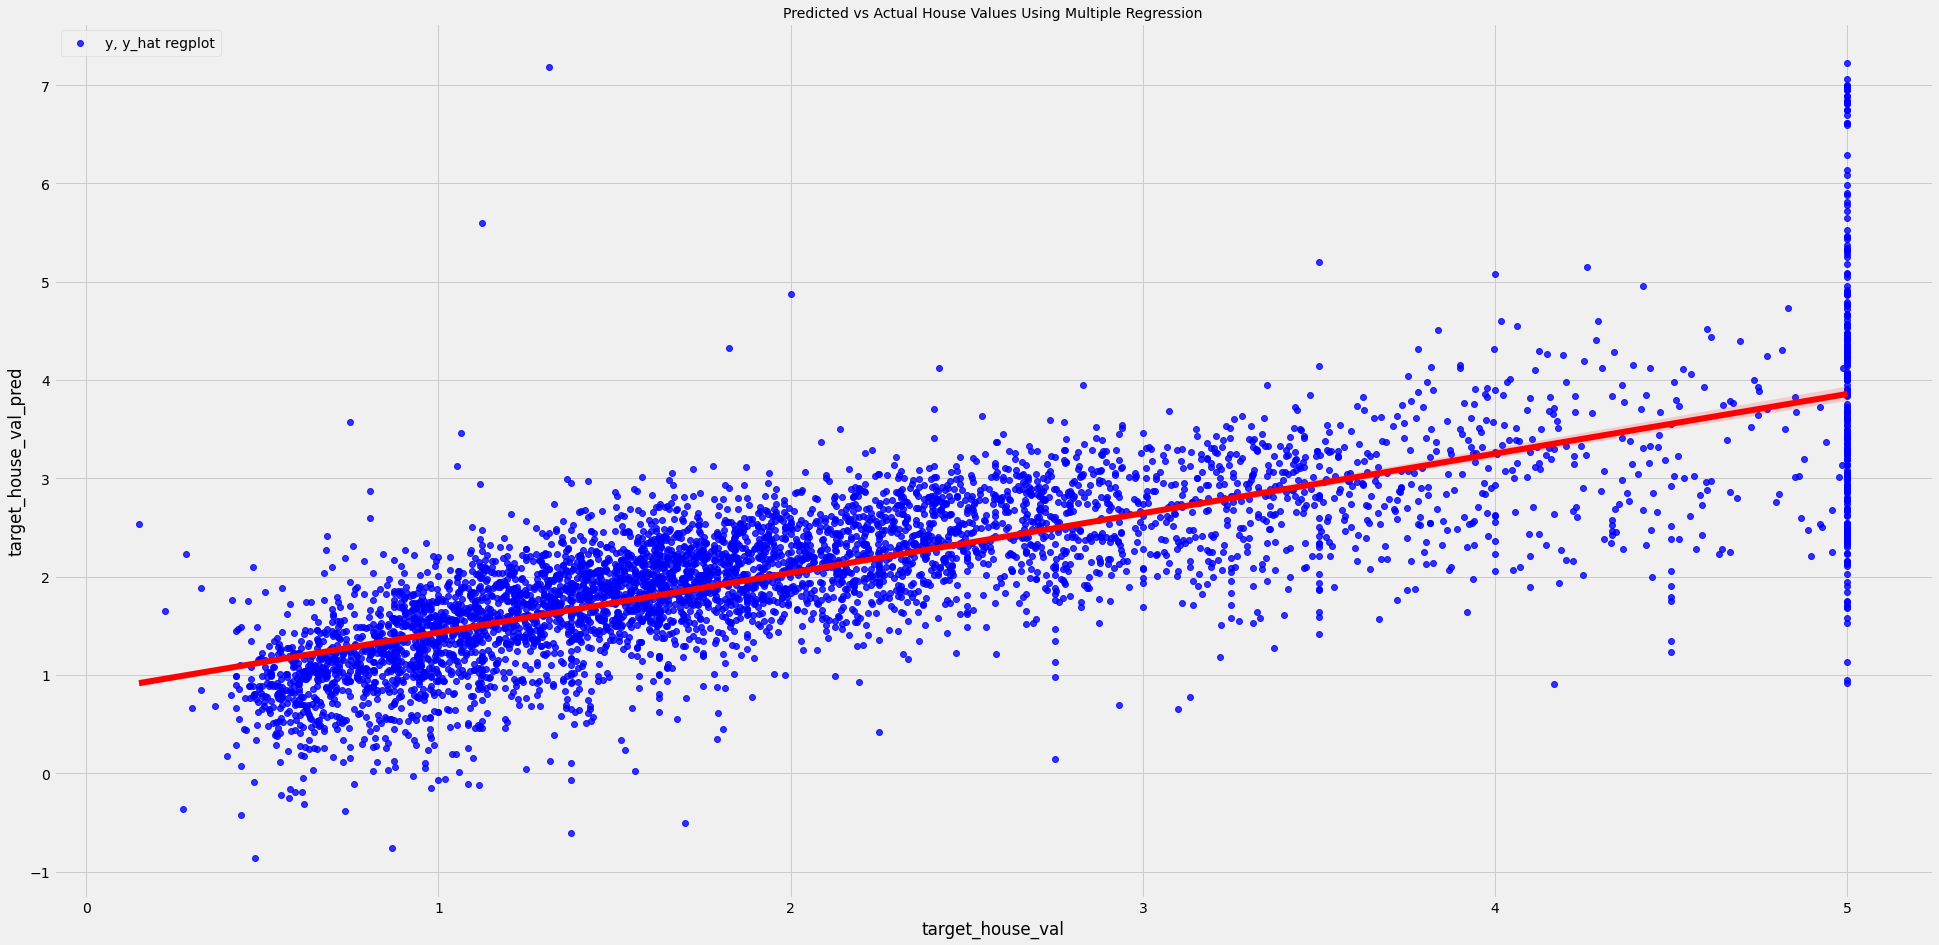

In [ ]:
# Plot the results
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
sns.regplot(x=df_cali_housing_pred.target_house_val, y=df_cali_housing_pred.target_house_val_pred, 
  color='blue', label='y, y_hat regplot', line_kws={"color": "red"})
ax.set_title('Predicted vs Actual House Values Using Multiple Regression', fontsize=14)
ax.legend(loc='upper left')
plt.show()

# Model Predictions: Polynomial Regression

In [ ]:
# Create the training and test sets
X = df_cali_housing[lst_features]
y = df_cali_housing.target_house_val
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

# Explore feature data
print(f'X {str_lb}{X}{str_lb}',
  f'X_train {str_lb}{X_train}{str_lb}',
  f'X_test {str_lb}{X_test}{str_lb}'
)

# Explore target data
print(f'y {str_lb}{y}{str_lb}',
  f'y_train {str_lb}{y_train}{str_lb}',
  f'y_test {str_lb}{y_test}{str_lb}'     
)

# Create the model using polynomial regression
plr_model_cali_housing = PolynomialFeatures(degree=2, include_bias=False)
plr_model_cali_housing.fit(X)
X = plr_model_cali_housing.transform(X)
plr_model_cali_housing = LinearRegression()

# Train the model
plr_model_cali_housing.fit(X_train, y_train)

# Predict house values for test set
y_hat = plr_model_cali_housing.predict(X_test)

# Predict house values for train set
y_hat_train = plr_model_cali_housing.predict(X_train)

# Create new dataframe comparing actual and predicted results
df_cali_housing_pred = X_test.copy()
df_cali_housing_pred['target_house_val'] = df_cali_housing.target_house_val
df_cali_housing_pred['target_house_val_pred'] = y_hat
print(f'Feature, Target and Prediction Comparison: {str_lb}{df_cali_housing_pred}{str_lb}')

X 
 
       ave_bedrms  ave_occup  ave_rooms  house_age  latitude  longitude  med_inc  population
0      1.024       2.556      6.984      41.0       37.88    -122.23     8.325     322.0    
1      0.972       2.110      6.238      21.0       37.86    -122.22     8.301    2401.0    
2      1.073       2.802      8.288      52.0       37.85    -122.24     7.257     496.0    
3      1.073       2.548      5.817      52.0       37.85    -122.25     5.643     558.0    
4      1.081       2.181      6.282      52.0       37.85    -122.25     3.846     565.0    
...           ...        ...        ...        ...       ...        ...      ...         ...
20635  1.133       2.561      5.045      25.0       39.48    -121.09     1.560     845.0    
20636  1.316       3.123      6.114      18.0       39.49    -121.21     2.557     356.0    
20637  1.120       2.326      5.206      17.0       39.43    -121.22     1.700    1007.0    
20638  1.172       2.123      5.330      18.0       39.43    -121

## Evalutate the Results

In [ ]:
# Evaluate the results
flt_score = plr_model_cali_housing.score(X_test, y_test)
flt_r2_score = r2_score(y_test, y_hat)
flt_mse = mean_squared_error(y_test, y_hat)
flt_score_train = plr_model_cali_housing.score(X_train, y_train)
flt_r2_score_train = r2_score(y_train, y_hat_train)

print(f'Model Coefficents: {str_lb}{plr_model_cali_housing.coef_}{str_lb}',
  f'Model Intercept: {str_lb}{plr_model_cali_housing.intercept_}{str_lb}',      
  f'Model Score: {str_lb}{flt_score:.4f}{str_lb}',
  f'Model r2 score: {str_lb}{flt_r2_score:.4f}{str_lb}',
  f'Model MSE: {str_lb}{flt_mse:.4f}{str_lb}',
  f'Model Score Training Set: {str_lb}{flt_score_train:.4f}{str_lb}',
  f'Model r2 score Training Set: {str_lb}{flt_r2_score_train:.4f}{str_lb}'      
)

Model Coefficents: 
 
[ 6.16730152e-01 -4.48838256e-03 -1.03311173e-01  9.59864665e-03
 -4.17353284e-01 -4.30614462e-01  4.39091042e-01 -7.63275197e-06]
 
 Model Intercept: 
 
-36.6095937787143
 
 Model Score: 
 
0.5912
 
 Model r2 score: 
 
0.5912
 
 Model MSE: 
 
0.5404
 
 Model Score Training Set: 
 
0.6110
 
 Model r2 score Training Set: 
 
0.6110
 



## Plot the Results

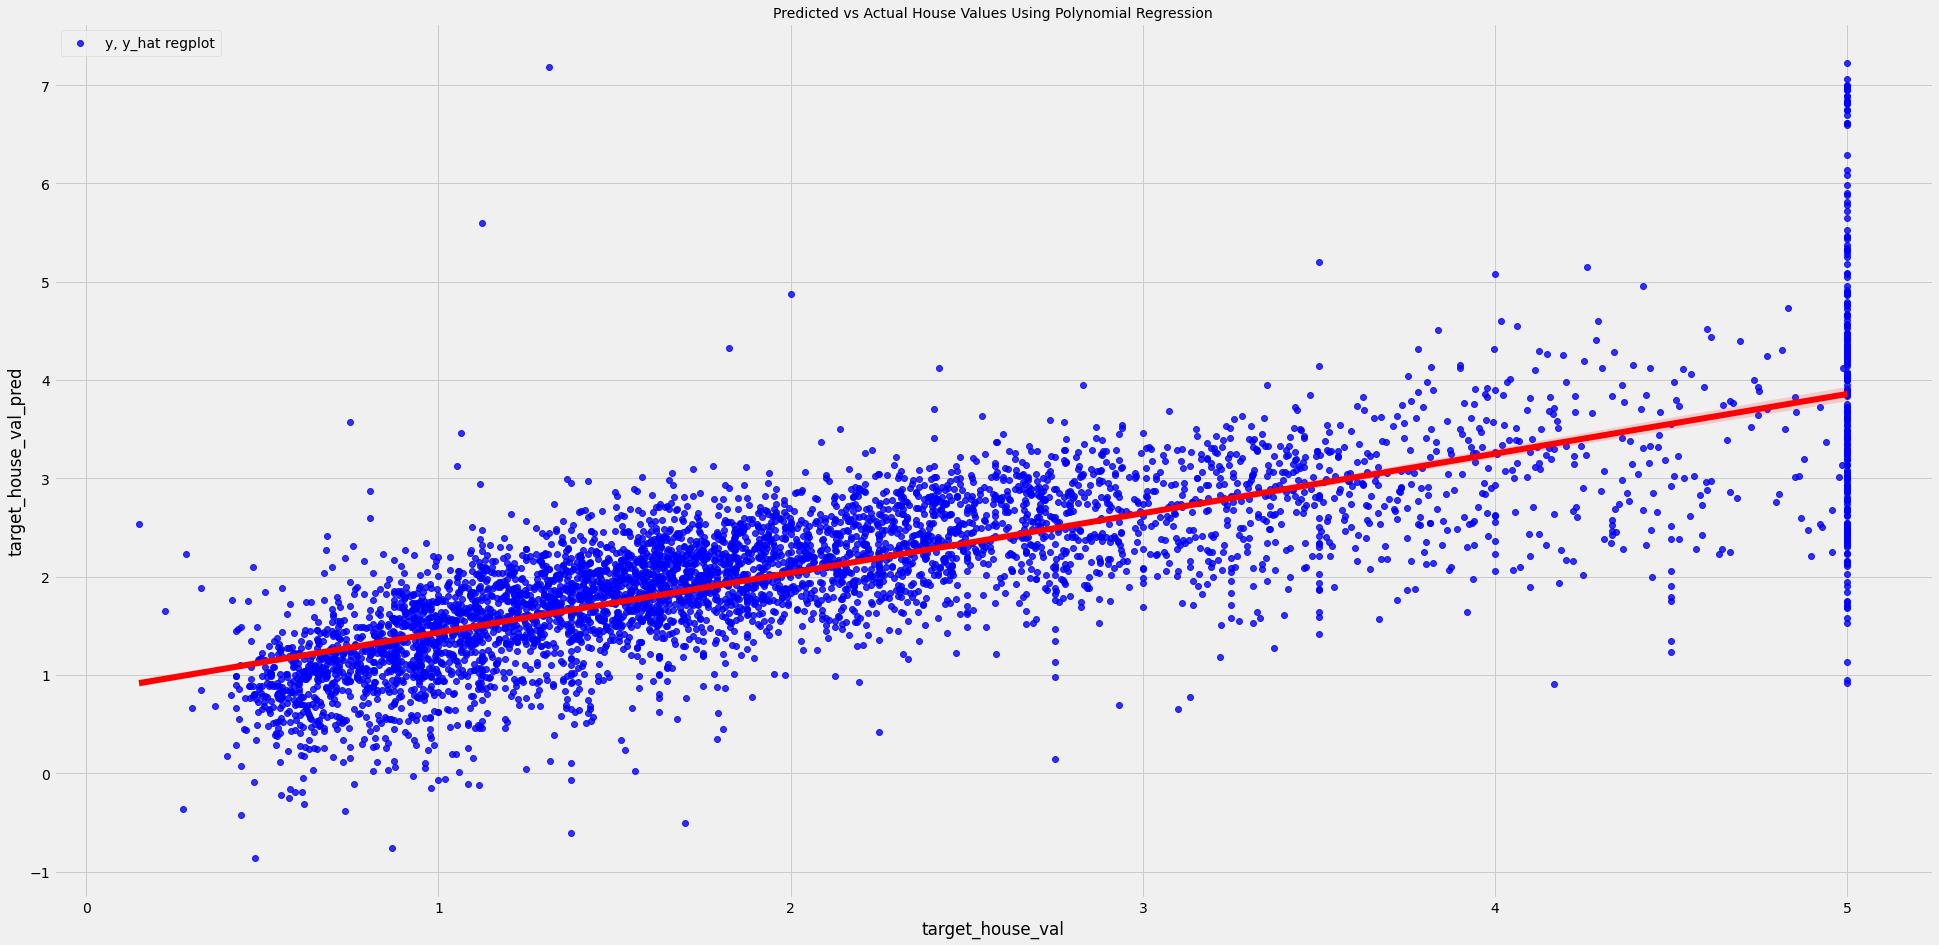

In [ ]:
# Plot the results
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot()
sns.regplot(x=df_cali_housing_pred.target_house_val, y=df_cali_housing_pred.target_house_val_pred, 
  color='blue', label='y, y_hat regplot', line_kws={"color": "red"})
ax.set_title('Predicted vs Actual House Values Using Polynomial Regression', fontsize=14)
ax.legend(loc='upper left')
plt.show()

# Deploy the Model Using Polynomial Regression

In [ ]:
# Deploy the model on fictional housing features
lst_fictional_cali_housing = [[1, 4, 6, 22, 33, -117, 4, 1000], [1, 3, 5, 30, 33, -117, 5, 1500]]
df_fictional_cali_housing = pd.DataFrame(lst_fictional_cali_housing, columns=df_cali_housing_pred.columns.drop(['target_house_val', 'target_house_val_pred']))

# Predict house values for the fictional set
y_hat = plr_model_cali_housing.predict(df_fictional_cali_housing)

# Create new dataframe with comparing predicted values
df_fictional_cali_housing['target_house_val_pred'] = y_hat
print(f'Deployed Results: {str_lb}{df_fictional_cali_housing}{str_lb}')

Deployed Results: 
 
   ave_bedrms  ave_occup  ave_rooms  house_age  latitude  longitude  med_inc  population  target_house_val_pred
0  1           4          6          22         33       -117        4        1000        1.938                
1  1           3          5          30         33       -117        5        1500        2.558                
 

